# Scrapping Amazon Reviews

In [1]:
#importing packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
#using requests which alows us to send HTTP requests using Python
def get_soup(url):
    url = url
    page =requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup

In [3]:
reviewlist = []
#fetching only data which is necessary like rating title and content given by the customers
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'content': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [12]:
#creating a loop from 1 to 100 reviews pages of the product
for x in range(1,100):
    soup = get_soup(f'https://www.amazon.in/Rockerz-370-Headphone-Bluetooth-Lightweight/product-reviews/B0856HNMR7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break
print('Done')

Getting page: 1
730
Getting page: 2
740
Getting page: 3
750
Getting page: 4
760
Getting page: 5
770
Getting page: 6
780
Getting page: 7
790
Getting page: 8
800
Getting page: 9
810
Getting page: 10
820
Getting page: 11
830
Getting page: 12
840
Getting page: 13
850
Getting page: 14
860
Getting page: 15
870
Getting page: 16
880
Getting page: 17
890
Getting page: 18
900
Getting page: 19
910
Getting page: 20
920
Getting page: 21
930
Getting page: 22
940
Getting page: 23
950
Getting page: 24
960
Getting page: 25
970
Getting page: 26
980
Getting page: 27
990
Getting page: 28
990
Getting page: 29
1000
Getting page: 30
1000
Getting page: 31
1010
Getting page: 32
1020
Getting page: 33
1030
Getting page: 34
1040
Getting page: 35
1050
Getting page: 36
1060
Getting page: 37
1070
Getting page: 38
1080
Getting page: 39
1090
Getting page: 40
1100
Getting page: 41
1110
Getting page: 42
1120
Getting page: 43
1130
Getting page: 44
1140
Getting page: 45
1150
Getting page: 46
1160
Getting page: 47
1170
Get

In [13]:
#creating dataframe of the list 
df = pd.DataFrame(reviewlist)
df

title  rating  \
0                                   Good budget product     4.0   
1         It's beautiful and powerful at the same time.     4.0   
2                                          Good product     4.0   
3                         Listening experience is great     4.0   
4                                                   Mic     4.0   
...                                                 ...     ...   
1675                                            Battery     4.0   
1676                     Perfect value of cost product.     4.0   
1677                                           Ear cups     4.0   
1678                                       Nice product     4.0   
1679  Very nice product.... Satisfied with the purchase     4.0   

                                                content  
0     It's a decent budget product from Boat.This su...  
1     So I just got this and when I first tried it, ...  
2                            Sound quality is very good  
3     This headphones sounds great when it comes to ...  
4                          Only mic quality in not good  
...                                                 ...  
1675                         Battery backup is too good  
1676                                                     
1677  The ear cups have hard cushion. Not very comfo...  
1678  I like this productThis product has many featu...  
1679           Quality is really amazing with prize ...  

[1680 rows x 3 columns]

In [6]:
df.shape

(720, 3)

In [7]:
df['content'].unique

<bound method Series.unique of 0      It's a decent budget product from Boat.This su...
1      So I just got this and when I first tried it, ...
2                             Sound quality is very good
3      This headphones sounds great when it comes to ...
4                           Only mic quality in not good
                             ...                        
715                                                 good
716    its sound is very good its not noise cancellat...
717    When i connect whit my mobile then one speak i...
718    Worst product it was very delicate in body and...
719                                         Good product
Name: content, Length: 720, dtype: object>

In [8]:
#combining two columns title and content to make a new column called reviews 
df["reviews"] = df["title"]+df["content"]
df.head()

title  rating  \
0                            Good budget product     4.0   
1  It's beautiful and powerful at the same time.     4.0   
2                                   Good product     4.0   
3                  Listening experience is great     4.0   
4                                            Mic     4.0   

                                             content  \
0  It's a decent budget product from Boat.This su...   
1  So I just got this and when I first tried it, ...   
2                         Sound quality is very good   
3  This headphones sounds great when it comes to ...   
4                       Only mic quality in not good   

                                             reviews  
0  Good budget productIt's a decent budget produc...  
1  It's beautiful and powerful at the same time.S...  
2             Good productSound quality is very good  
3  Listening experience is greatThis headphones s...  
4                    MicOnly mic quality in not good

In [9]:
#instead of droping the columns we can access the columns we need in further process by iloc 
amazon = df.iloc[:,[1,3]]
amazon

rating                                            reviews
0       4.0  Good budget productIt's a decent budget produc...
1       4.0  It's beautiful and powerful at the same time.S...
2       4.0             Good productSound quality is very good
3       4.0  Listening experience is greatThis headphones s...
4       4.0                    MicOnly mic quality in not good
..      ...                                                ...
715     5.0                                             okgood
716     5.0  terrificits sound is very good its not noise c...
717     4.0  This product is GoodWhen i connect whit my mob...
718     1.0  Even 1 star is more for this productWorst prod...
719     5.0                                    OsmGood product

[720 rows x 2 columns]

In [10]:
#now we have more information in less columns 

In [11]:
!pip install data-purifier 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 595.3 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 813.6 kB/s eta 0:00:001m920.6 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 476.8 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.7/241.7 kB 569.3 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 622.9 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 565.4 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 473.7 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 809.1 kB/s eta 0:00:001m642.2 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 kB 815.3 kB/s eta 0:00:001m812.4 kB/s

In [12]:
# !pip install spacy download en_core_web_sm

In [13]:
import datapurifier as dp
from datapurifier import Mleda
from datapurifier import Nlpeda
from datapurifier import Nlpurifier 

import seaborn as sns 
import pandas as pd 
import numpy as np

print (dp.__version__)

0.3.4


In [14]:
amazon

rating                                            reviews
0       5.0  I am very happy to buy this product...Nice pro...
1       4.0  Amazingly AmazonIt says 8 hrs but since I use ...
2       4.0  base kingthe base is really good. it a value f...
3       1.0  The head phone plastic band broken out.This pr...
4       2.0  Cheap Plastic, Average product.  Sound is dist...
..      ...                                                ...
745     5.0               Wonderful!Very good quality and bass
746     5.0                         ExcellentExcellent product
747     5.0  Fast delivery and jenue Products from  Amezon❤...
748     3.0  Good headphone at this price ..build material ...
749     5.0  Worth every pennyExcellent quality and sound ....

[750 rows x 2 columns]

In [15]:
amazon.to_csv('amazon.csv')

In [16]:
import datapurifier as dp
pure = Nlpurifier(amazon, "reviews")


--------------------------------------------------


Button(description='Start Purifying', style=ButtonStyle())

In [17]:
from IPython.display import display

In [18]:
display(pure.df)

rating                                            reviews
0       5.0  I am very happy to buy this product...Nice pro...
1       4.0  Amazingly AmazonIt says 8 hrs but since I use ...
2       4.0  base kingthe base is really good. it a value f...
3       1.0  The head phone plastic band broken out.This pr...
4       2.0  Cheap Plastic, Average product.  Sound is dist...
..      ...                                                ...
745     5.0               Wonderful!Very good quality and bass
746     5.0                         ExcellentExcellent product
747     5.0  Fast delivery and jenue Products from  Amezon❤...
748     3.0  Good headphone at this price ..build material ...
749     5.0  Worth every pennyExcellent quality and sound ....

[750 rows x 2 columns]

In [19]:
pure.df

rating                                            reviews
0       5.0  I am very happy to buy this product...Nice pro...
1       4.0  Amazingly AmazonIt says 8 hrs but since I use ...
2       4.0  base kingthe base is really good. it a value f...
3       1.0  The head phone plastic band broken out.This pr...
4       2.0  Cheap Plastic, Average product.  Sound is dist...
..      ...                                                ...
745     5.0               Wonderful!Very good quality and bass
746     5.0                         ExcellentExcellent product
747     5.0  Fast delivery and jenue Products from  Amezon❤...
748     3.0  Good headphone at this price ..build material ...
749     5.0  Worth every pennyExcellent quality and sound ....

[750 rows x 2 columns]

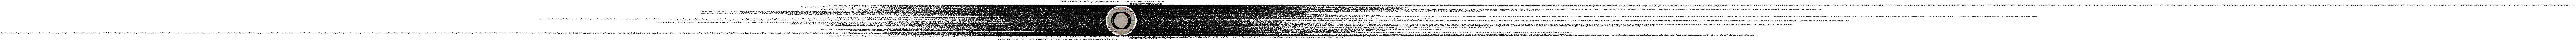

In [20]:
mleda=Mleda(pure.df)

In [21]:
amazon=pure.df
amazon['original']= df['reviews']
cols=amazon.columns.tolist()
cols = cols[-1:]+cols[:-1]
amazon= amazon[cols]
amazon

original  rating  \
0    I am very happy to buy this product...Nice pro...     5.0   
1    Amazingly AmazonIt says 8 hrs but since I use ...     4.0   
2    base kingthe base is really good. it a value f...     4.0   
3    The head phone plastic band broken out.This pr...     1.0   
4    Cheap Plastic, Average product.  Sound is dist...     2.0   
..                                                 ...     ...   
745               Wonderful!Very good quality and bass     5.0   
746                         ExcellentExcellent product     5.0   
747  Fast delivery and jenue Products from  Amezon❤...     5.0   
748  Good headphone at this price ..build material ...     3.0   
749  Worth every pennyExcellent quality and sound ....     5.0   

                                               reviews  
0    I am very happy to buy this product...Nice pro...  
1    Amazingly AmazonIt says 8 hrs but since I use ...  
2    base kingthe base is really good. it a value f...  
3    The head phone plastic band broken out.This pr...  
4    Cheap Plastic, Average product.  Sound is dist...  
..                                                 ...  
745               Wonderful!Very good quality and bass  
746                         ExcellentExcellent product  
747  Fast delivery and jenue Products from  Amezon❤...  
748  Good headphone at this price ..build material ...  
749  Worth every pennyExcellent quality and sound ....  

[750 rows x 3 columns]

### N_gram

In [22]:
from textblob import Word
from textblob import TextBlob

In [23]:
#bigrams
TextBlob(amazon['reviews'] [0]).ngrams(2)

[WordList(['I', 'am']),
 WordList(['am', 'very']),
 WordList(['very', 'happy']),
 WordList(['happy', 'to']),
 WordList(['to', 'buy']),
 WordList(['buy', 'this']),
 WordList(['this', 'product']),
 WordList(['product', 'Nice']),
 WordList(['Nice', 'product']),
 WordList(['product', '👍👍'])]

In [24]:
#trigrams
TextBlob(amazon['reviews'] [0]).ngrams(3)

[WordList(['I', 'am', 'very']),
 WordList(['am', 'very', 'happy']),
 WordList(['very', 'happy', 'to']),
 WordList(['happy', 'to', 'buy']),
 WordList(['to', 'buy', 'this']),
 WordList(['buy', 'this', 'product']),
 WordList(['this', 'product', 'Nice']),
 WordList(['product', 'Nice', 'product']),
 WordList(['Nice', 'product', '👍👍'])]

# CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv=CountVectorizer()
reviewcv=cv.fit_transform(amazon['reviews'])
print(cv.get_feature_names())

['0v', '10', '100', '1000', '10000', '1000000', '1000first', '1000then', '100rs', '1079rupees', '1099', '10bass', '10bluetooth', '10build', '10durability', '10hrs', '10m', '10mic', '10sec', '10sound', '10total', '1100', '1100rs', '1199', '12', '1200', '1200rs', '1200rupees', '1200the', '12yr', '13992', '14', '1499', '14th', '15', '1500', '15days', '15hrs', '15th', '18', '19th', '1hr', '1k', '1kbought', '1month', '1or', '1st', '1year', '20', '200', '2020', '2021', '2021didn', '21', '22', '22nd', '23', '24th', '25', '27', '29', '2999', '2hr', '2hrs', '2hrs2', '2k', '2nd', '30', '300', '3000', '300rs', '30hr', '30mins', '30rs', '320', '350', '370', '370i', '370initially', '370it', '370this', '38', '3hrs', '3rd', '40', '400', '40mm', '450', '450note', '46', '4nov', '4th', '50', '500', '50if', '510', '5bass', '5bass4', '5battery', '5comfort', '5connectivity', '5ears', '5k', '5material', '5mic', '5mm', '5noise', '5overall', '5recommended', '5sound', '5to6', '60', '600', '60mts', '67', '6days

In [27]:
cv = CountVectorizer()

reviewcv = cv.fit_transform(amazon['reviews'] )
sum_words = reviewcv.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['words', 'count']


pd.options.display.max_rows=None
wf_df

words  count
0                                 is   1019
1                                 it    841
2                                the    839
3                                and    609
4                               good    571
5                                for    508
6                            quality    503
7                                not    485
8                            product    474
9                                 to    463
10                              this    418
11                             sound    375
12                               but    358
13                              very    342
14                                of    326
15                                in    272
16                               you    215
17                              with    204
18                                my    159
19                             after    159
20                                on    157
21                               buy    153
22                              that    152
23                               are    150
24                                so    147
25                               use    145
26                              bass    141
27                                if    139
28                         headphone    137
29                              have    135
30                              also    133
31                        headphones    128
32                                as    127
33                         bluetooth    125
34                               one    121
35                               can    120
36                               was    118
37                           battery    116
38                                be    113
39                                at    110
40                              boat    108
41                             price    105
42                               its    105
43                               don    101
44                              just     98
45                              ears     96
46                                no     93
47                              only     88
48                               ear     86
49                              like     85
50                               bad     85
51                              from     84
52                              nice     83
53                              best     82
54                             using     82
55                              than     80
56                           working     80
57                              more     79
58                              time     78
59                                or     78
60                             money     75
61                              when     75
62                              poor     72
63                               all     71
64                             great     71
65                                am     70
66                                go     70
67                             other     66
68                              days     65
69                             noise     65
70                               too     64
71                              will     63
72                              used     63
73                              long     62
74                               has     61
75                      connectivity     61
76                            broken     60
77                              even     59
78                      cancellation     59
79                       comfortable     58
80                             music     57
81                             there     57
82                            months     57
83                            really     56
84                             could     55
85                             build     55
86                              they     54
87                            better     52
88                           plastic     51
89                             month     51
90                         

### CountVectorizer with Bi-gram & Tri-gram

Bi-gram

In [28]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [29]:
top2_words = get_top_n2_words(amazon['reviews'], n=5000) 
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df

Bi-gram  Freq
0                  sound quality   197
1                     quality is   193
2                         is not   120
3                        is good   118
4                   this product   100
5                        is very    93
6                          it is    88
7                     product is    80
8                       good but    80
9                         if you    73
10                     very good    68
11                   the product    62
12                        of the    58
13                     the sound    57
14                        it for    55
15                     very very    54
16                        go for    53
17                      buy this    52
18                  good product    49
19            noise cancellation    48
20                       but the    48
21                       is also    46
22                       don buy    46
23                        but it    46
24                      sound is    45
25                       and the    45
26                       bass is    44
27                     more than    42
28                  battery life    42
29                    this price    42
30                       in this    42
31                 build quality    41
32                       for the    41
33        bluetooth connectivity    41
34                       you can    40
35                    good sound    39
36                      good for    39
37                   quality and    38
38                     value for    35
39                     could not    35
40                        not be    35
41                battery backup    34
42                      not good    34
43                 the headphone    33
44                        to buy    32
45                        for it    32
46                   not working    32
47                   media could    32
48                     be loaded    32
49                     aux cable    31
50                        use it    31
51                       this is    31
52                        in the    29
53                     for money    29
54                        buy it    28
55                      for long    28
56                        and it    28
57                      not that    28
58                     the price    27
59                      very bad    27
60               connectivity is    27
61                      for this    26
62                      there is    26
63                      good and    25
64                       you are    25
65                        to use    25
66                this headphone    25
67                  headphone is    25
68                        on the    24
69                    quality of    24
70                   product but    24
71                       my ears    24
72                        at all    24
73                   after using    24
74                      the best    23
75                       are not    23
76                        it has    23
77                        is too    23
78                     and sound    23
79                the headphones    22
80                       have to    22
81                       wear it    21
82                   price range    21
83                        not so    20
84                       as well    20
85                        it not    20
86                      using it    20
87                        is the    20
88                      with the    20
89                     sound and    20
90                  bass quality    20
91                     very nice    20
92                   product and    20
93                         is so    20
94                  nice product    19
95                         to be    19
96                       at this    19
97                  good quality    19
98                     long time    19
99                        it was    19
100                    very poor    19
101                       to the    19
102     

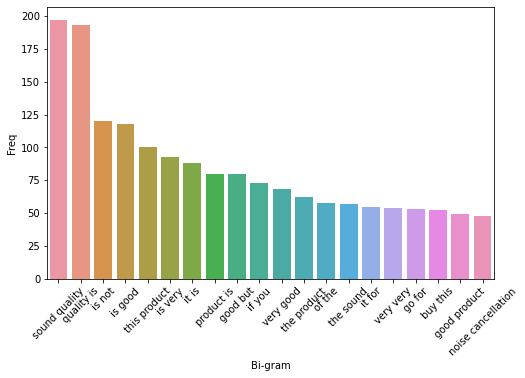

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (8, 5)) #figure size of the visualization
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.show()

Tri-gram

In [31]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [32]:
top3_words = get_top_n3_words(amazon['reviews'] , n=5000)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

top3_df

Tri-gram  Freq
0                     sound quality is    95
1                       very very very    46
2                      quality is good    37
3                         could not be    35
4                          is good but    35
5                      media could not    32
6                        not be loaded    32
7                    the sound quality    32
8                         is very good    30
9                      quality is very    26
10                    buy this product    24
11                           go for it    24
12                  good sound quality    23
13                        don buy this    22
14                   sound quality and    22
15                     value for money    21
16                      the product is    21
17                       in this price    20
18                     this product is    19
19           bluetooth connectivity is    19
20                    build quality is    18
21                          if you are    18
22                         is not good    17
23                         to buy this    16
24                         there is no    16
25                       for more than    16
26                      is not working    16
27                   battery backup is    16
28                        good but the    16
29                     battery life is    15
30                      quality is not    15
31                        is also good    15
32                    this price range    14
33                     product is good    14
34                       at this price    13
35                      of the product    13
36                       for long time    13
37                       for the price    13
38                   and sound quality    13
39                    good product but    12
40                           it is not    12
41                        the sound is    11
42                      quality of the    11
43                    of the headphone    11
44                          use it for    11
45                          not at all    11
46                         is not that    11
47               noise cancellation is    11
48                         the bass is    10
49                         and bass is    10
50                         wear it for    10
51                         if you want    10
52                         it for more    10
53                   with this product    10
54                     bass quality is    10
55                        is very poor    10
56                       not that good    10
57                   very good product    10
58                       sound is good     9
59                        not good for     9
60                      the quality of     9
61                   this headphone is     9
62                         if you have     9
63                      waste of money     9
64                   sound quality but     9
65                       very good but     9
66                      is really good     8
67                       the aux cable     8
68                          don buy it     8
69                     product is very     8
70                           to use it     8
71                          it is very     8
72                         is the best     8
73                    boat rockerz 370     8
74                        more than 30     8
75                          one of the     8
76                      product is not     8
77               product sound quality     8
78                  quality is average     7
79                    and battery life     7
80                          can use it     7
81                         is very bad     7
82                   the build quality     7
83                         this is the     7
84                           but it is     7
85                      with aux cable     7
86                         can wear it     7
87                     this product it     7
88                       

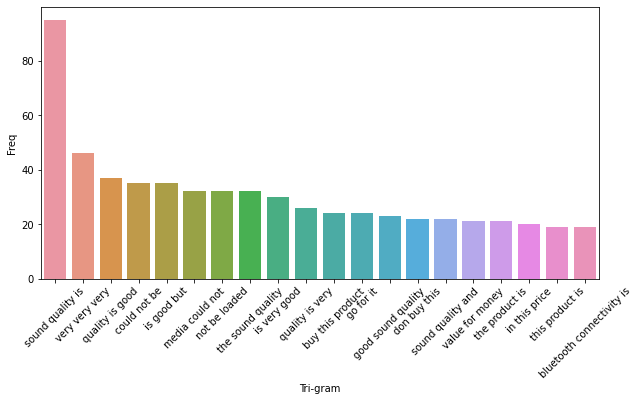

In [33]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])
plt.show()

# Named Entity Recognition (NER)

In [34]:
import string 
import re #regular expression
import spacy

In [35]:
nlp = spacy.load("en_core_web_sm")

one_block = str(amazon['reviews'])
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [36]:
#nouns and verbs in the text
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

['buy', 'product', 'says', 'hrs', 'use', 'base', 'kingthe', 'base', 'value', 'head', 'phone', 'plastic', 'band', 'broken', 'pr', 'product', 'dist', 'Value', 'moneySound', 'crystal', 'buy', 'Bass', 'used', 'month', 'month', 'month!!!I', 'f', 'ears', 'head', 'stared', 'paining', 'like', 'start', 'sou', 'goodAfter', 'reading', 'reviews', 'som', 'mind', 'blowing', 'product', 'wish', 'give', 'stars', 'Problem', 'headphones', 'months', 'quality', 'doub', 'purchase', 'price(999)I', 'bought', 'attend', 'product', 'o', 'lifeI', 'using', 'earphone', 'price', 'pain', 'using', 'hea', 'sound', 'quality', 'vocals', 'waste', 'believe', 'Hear', 'itWas', 'working', 'fine', 'week', 'months', 'headphones', 'mic', 'product', 'price!First', 'version', 'price', 'product', 'sound', 'longtime', 'aches', 'ear', 'cause', 'product', 'price', 'media', 'coul', 'product', 'Broken', 'bass', 'quality', 'headphone', 'non', '...', 'sound', 'productListening', 'Music', 'walking', 'Buy', 'budget', 'things', 'opening', 'h

In [37]:

len(nouns_verbs)

1866

In [38]:
#Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
#with collected nouns and verbs
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['words','count']
wd_df

words  count
0                   product    172
1                   quality    130
2                     sound     66
3                       buy     35
4                     price     28
5                 headphone     27
6                headphones     23
7                     media     22
8                     value     19
9                      bass     19
10                       go     19
11                  battery     18
12                    money     18
13                      ear     17
14                  working     16
15                    using     14
16                    month     13
17                     ears     13
18                      use     11
19                   bought     11
20                     boat     11
21                   broken     10
22                     used     10
23                    waste     10
24                  headset     10
25                    music      9
26                     life      9
27                     head      8
28                    build      8
29                 producti      8
30                     love      8
31                    phone      7
32                     like      7
33                     days      7
34                  plastic      6
35                       pr      6
36                   months      6
37                      hea      6
38                     have      6
39                     time      6
40                      got      6
41                    built      6
42               microphone      6
43                    loved      6
44                     side      6
45                    liked      6
46                bluetooth      6
47                     band      5
48                 purchase      5
49                   budget      5
50                   review      5
51                    piece      5
52                 material      5
53                      has      5
54                     want      5
55                    broke      5
56                   design      5
57                  ordered      5
58                   loaded      5
59                    noise      5
60                 expected      5
61                   backup      5
62                    produ      5
63                    issue      5
64                  comfort      5
65                packaging      5
66             connectivity      5
67                      qua      5
68                  problem      4
69                     hear      4
70                     week      4
71                  headpho      4
72                     read      4
73                     work      4
74                    range      4
75                 received      4
76                listening      4
77                     wear      4
78                 products      4
79                       is      4
80                      get      4
81               experience      4
82                   device      4
83                      had      4
84              performance      4
85                  looking      4
86                   return      4
87                     base      3
88                  reviews      3
89                   buying      3
90                   choice      3
91                   goodit      3
92                    batte      3
93                  rockerz      3
94                  improve      3
95                    cable      3
96                      goo      3
97                    hurts      3
98                     good      3
99                      day      3
100                    pair      3
101                 connect      3
102                      ve      3
103               according      3
104                    need      3
105                     try      3
106                goodgood      3
107                  sounds      3
108                   thing      3
109                  expect      3
110                    cups      3
111                     hrs      2
112                 crystal      2
113                 paining     

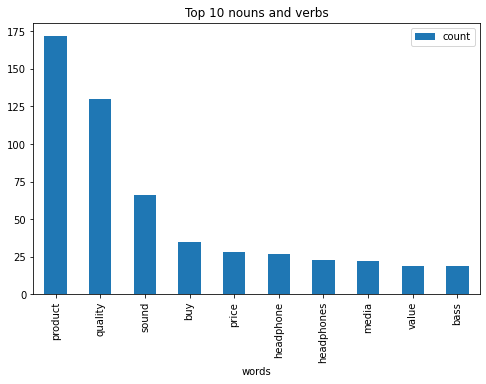

In [39]:
# Visualizing results (Barchart for top 10[nouns + verbs])

wd_df[0:10].plot.bar(x='words',figsize=(8,5),title='Top 10 nouns and verbs');
plt.show()

# Word Cloud

In [40]:
from PIL import Image

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('words')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
mask = np.array(Image.open("D:\\DATA SCIENCE\\Project\\Sentiment Analysis on Amazon Product Reviews\\amazon-icon-6.png"))
wordcloud = WordCloud(width=10000,height=5000,background_color='white',max_words=500,
                   colormap='Set1', mask=mask, stopwords=STOPWORDS).generate(str(wd_df))
plt.savefig("amazon.png", format="png")
plot_cloud(wordcloud)
plt.show()

## Sentiment Analysis for each word

In [41]:
#sentiment
wd_df['words'][:5].apply(lambda x: TextBlob(x).sentiment)
wd_df['sentiment'] = wd_df['words'].apply(lambda x: TextBlob(x).sentiment[0] )
wd_df[['words','sentiment']]

words  sentiment
0                   product   0.000000
1                   quality   0.000000
2                     sound   0.400000
3                       buy   0.000000
4                     price   0.000000
5                 headphone   0.000000
6                headphones   0.000000
7                     media   0.000000
8                     value   0.000000
9                      bass  -0.150000
10                       go   0.000000
11                  battery   0.000000
12                    money   0.000000
13                      ear   0.000000
14                  working   0.000000
15                    using   0.000000
16                    month   0.000000
17                     ears   0.000000
18                      use   0.000000
19                   bought   0.000000
20                     boat   0.000000
21                   broken  -0.400000
22                     used   0.000000
23                    waste  -0.200000
24                  headset   0.000000
25                    music   0.000000
26                     life   0.000000
27                     head   0.000000
28                    build   0.000000
29                 producti   0.000000
30                     love   0.500000
31                    phone   0.000000
32                     like   0.000000
33                     days   0.000000
34                  plastic   0.000000
35                       pr   0.000000
36                   months   0.000000
37                      hea   0.000000
38                     have   0.000000
39                     time   0.000000
40                      got   0.000000
41                    built   0.000000
42               microphone   0.000000
43                    loved   0.700000
44                     side   0.000000
45                    liked   0.600000
46                bluetooth   0.000000
47                     band   0.000000
48                 purchase   0.000000
49                   budget   0.000000
50                   review   0.000000
51                    piece   0.000000
52                 material   0.000000
53                      has   0.000000
54                     want   0.000000
55                    broke   0.000000
56                   design   0.000000
57                  ordered   0.000000
58                   loaded   0.000000
59                    noise   0.000000
60                 expected  -0.100000
61                   backup   0.000000
62                    produ   0.000000
63                    issue   0.000000
64                  comfort   0.000000
65                packaging   0.000000
66             connectivity   0.000000
67                      qua   0.000000
68                  problem   0.000000
69                     hear   0.000000
70                     week   0.000000
71                  headpho   0.000000
72                     read   0.000000
73                     work   0.000000
74                    range   0.000000
75                 received   0.000000
76                listening   0.000000
77                     wear   0.000000
78                 products   0.000000
79                       is   0.000000
80                      get   0.000000
81               experience   0.000000
82                   device   0.000000
83                      had   0.000000
84              performance   0.000000
85                  looking   0.000000
86                   return   0.000000
87                     base  -0.800000
88                  reviews   0.000000
89                   buying   0.000000
90                   choice   0.000000
91                   goodit   0.000000
92                    batte   0.000000
93                  rockerz   0.000000
94                  improve   0.000000
95                    cable   0.000000
96                      goo   0.000000
97                    hurts   0.000000
98                     good   0.700000
99                      day   0.000000
100                    pair   0.000000
101                 connect   0.000000
102  

In [42]:
#  subjectivity and polarity 
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

wd_df['Subjectivity'] = wd_df['words'].apply(getSubjectivity)
wd_df['Polarity'] = wd_df['words'].apply(getPolarity)


In [43]:
wd_df

words  count  sentiment  Subjectivity  Polarity
0                   product    172   0.000000      0.000000  0.000000
1                   quality    130   0.000000      0.000000  0.000000
2                     sound     66   0.400000      0.400000  0.400000
3                       buy     35   0.000000      0.000000  0.000000
4                     price     28   0.000000      0.000000  0.000000
5                 headphone     27   0.000000      0.000000  0.000000
6                headphones     23   0.000000      0.000000  0.000000
7                     media     22   0.000000      0.000000  0.000000
8                     value     19   0.000000      0.000000  0.000000
9                      bass     19  -0.150000      0.500000 -0.150000
10                       go     19   0.000000      0.000000  0.000000
11                  battery     18   0.000000      0.000000  0.000000
12                    money     18   0.000000      0.000000  0.000000
13                      ear     17   0.000000      0.000000  0.000000
14                  working     16   0.000000      0.000000  0.000000
15                    using     14   0.000000      0.000000  0.000000
16                    month     13   0.000000      0.000000  0.000000
17                     ears     13   0.000000      0.000000  0.000000
18                      use     11   0.000000      0.000000  0.000000
19                   bought     11   0.000000      0.000000  0.000000
20                     boat     11   0.000000      0.000000  0.000000
21                   broken     10  -0.400000      0.400000 -0.400000
22                     used     10   0.000000      0.000000  0.000000
23                    waste     10  -0.200000      0.000000 -0.200000
24                  headset     10   0.000000      0.000000  0.000000
25                    music      9   0.000000      0.000000  0.000000
26                     life      9   0.000000      0.000000  0.000000
27                     head      8   0.000000      0.000000  0.000000
28                    build      8   0.000000      0.000000  0.000000
29                 producti      8   0.000000      0.000000  0.000000
30                     love      8   0.500000      0.600000  0.500000
31                    phone      7   0.000000      0.000000  0.000000
32                     like      7   0.000000      0.000000  0.000000
33                     days      7   0.000000      0.000000  0.000000
34                  plastic      6   0.000000      0.000000  0.000000
35                       pr      6   0.000000      0.000000  0.000000
36                   months      6   0.000000      0.000000  0.000000
37                      hea      6   0.000000      0.000000  0.000000
38                     have      6   0.000000      0.000000  0.000000
39                     time      6   0.000000      0.000000  0.000000
40                      got      6   0.000000      0.000000  0.000000
41                    built      6   0.000000      0.000000  0.000000
42               microphone      6   0.000000      0.000000  0.000000
43                    loved      6   0.700000      0.800000  0.700000
44                     side      6   0.000000      0.000000  0.000000
45                    liked      6   0.600000      0.800000  0.600000
46                bluetooth      6   0.000000      0.000000  0.000000
47                     band      5   0.000000      0.000000  0.000000
48                 purchase      5   0.000000      0.000000  0.000000
49                   budget      5   0.000000      0.000000  0.000000
50                   review      5   0.000000      0.000000  0.000000
51                    piece      5   0.000000      0.000000  0.000000
52                 material      5   0.000000      0.000000  0.000000
53                      has      5   0.000000      0.000000  0.000000
54                     want      5   0.000000      0.000000  0.000000
55                    broke      5   0.000000      0.000000  0.000000
56                   design     

In [44]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
wd_df['Analysis'] = wd_df['Polarity'].apply(getAnalysis)

In [45]:
wd_df

words  count  sentiment  Subjectivity  Polarity  \
0                   product    172   0.000000      0.000000  0.000000   
1                   quality    130   0.000000      0.000000  0.000000   
2                     sound     66   0.400000      0.400000  0.400000   
3                       buy     35   0.000000      0.000000  0.000000   
4                     price     28   0.000000      0.000000  0.000000   
5                 headphone     27   0.000000      0.000000  0.000000   
6                headphones     23   0.000000      0.000000  0.000000   
7                     media     22   0.000000      0.000000  0.000000   
8                     value     19   0.000000      0.000000  0.000000   
9                      bass     19  -0.150000      0.500000 -0.150000   
10                       go     19   0.000000      0.000000  0.000000   
11                  battery     18   0.000000      0.000000  0.000000   
12                    money     18   0.000000      0.000000  0.000000   
13                      ear     17   0.000000      0.000000  0.000000   
14                  working     16   0.000000      0.000000  0.000000   
15                    using     14   0.000000      0.000000  0.000000   
16                    month     13   0.000000      0.000000  0.000000   
17                     ears     13   0.000000      0.000000  0.000000   
18                      use     11   0.000000      0.000000  0.000000   
19                   bought     11   0.000000      0.000000  0.000000   
20                     boat     11   0.000000      0.000000  0.000000   
21                   broken     10  -0.400000      0.400000 -0.400000   
22                     used     10   0.000000      0.000000  0.000000   
23                    waste     10  -0.200000      0.000000 -0.200000   
24                  headset     10   0.000000      0.000000  0.000000   
25                    music      9   0.000000      0.000000  0.000000   
26                     life      9   0.000000      0.000000  0.000000   
27                     head      8   0.000000      0.000000  0.000000   
28                    build      8   0.000000      0.000000  0.000000   
29                 producti      8   0.000000      0.000000  0.000000   
30                     love      8   0.500000      0.600000  0.500000   
31                    phone      7   0.000000      0.000000  0.000000   
32                     like      7   0.000000      0.000000  0.000000   
33                     days      7   0.000000      0.000000  0.000000   
34                  plastic      6   0.000000      0.000000  0.000000   
35                       pr      6   0.000000      0.000000  0.000000   
36                   months      6   0.000000      0.000000  0.000000   
37                      hea      6   0.000000      0.000000  0.000000   
38                     have      6   0.000000      0.000000  0.000000   
39                     time      6   0.000000      0.000000  0.000000   
40                      got      6   0.000000      0.000000  0.000000   
41                    built      6   0.000000      0.000000  0.000000   
42               microphone      6   0.000000      0.000000  0.000000   
43                    loved      6   0.700000      0.800000  0.700000   
44                     side      6   0.000000      0.000000  0.000000   
45                    liked      6   0.600000      0.800000  0.600000   
46                bluetooth      6   0.000000      0.000000  0.000000   
47                     band      5   0.000000      0.000000  0.000000   
48                 purchase      5   0.000000      0.000000  0.000000   
49                   budget      5   0.000000      0.000000  0.000000   
50                   review      5   0.000000      0.000000  0.000000   
51                    piece      5   0.000000      0.000000  0.000000   
52                 material      5   0.000000      0.000000  0.000000   
53                      has      5   0.000000      0.000000  0.000000   
54     

In [46]:
wd_df['Analysis'].count

<bound method Series.count of 0       Neutral
1       Neutral
2      Positive
3       Neutral
4       Neutral
5       Neutral
6       Neutral
7       Neutral
8       Neutral
9      Negative
10      Neutral
11      Neutral
12      Neutral
13      Neutral
14      Neutral
15      Neutral
16      Neutral
17      Neutral
18      Neutral
19      Neutral
20      Neutral
21     Negative
22      Neutral
23     Negative
24      Neutral
25      Neutral
26      Neutral
27      Neutral
28      Neutral
29      Neutral
30     Positive
31      Neutral
32      Neutral
33      Neutral
34      Neutral
35      Neutral
36      Neutral
37      Neutral
38      Neutral
39      Neutral
40      Neutral
41      Neutral
42      Neutral
43     Positive
44      Neutral
45     Positive
46      Neutral
47      Neutral
48      Neutral
49      Neutral
50      Neutral
51      Neutral
52      Neutral
53      Neutral
54      Neutral
55      Neutral
56      Neutral
57      Neutral
58      Neutral
59      Neutral
60     Neg

<AxesSubplot:>

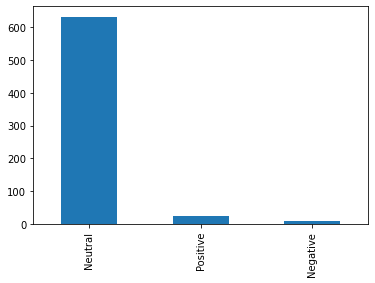

In [47]:
wd_df['Analysis'].value_counts().plot(kind='bar')

# Sentiment Analysis for each review

In [48]:
amazon['reviews'][:5].apply(lambda x: TextBlob(x).sentiment)


0                                   (1.0, 1.0)
1     (0.3357142857142857, 0.6285714285714287)
2                  (0.14999999999999997, 0.75)
3                                  (-0.4, 0.4)
4    (0.21833887043189368, 0.5097120708748616)
Name: reviews, dtype: object

In [49]:
amazon['sentiment'] = amazon['reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
amazon[['reviews','sentiment']]

reviews     sentiment
0    I am very happy to buy this product...Nice pro...  1.000000e+00
1    Amazingly AmazonIt says 8 hrs but since I use ...  3.357143e-01
2    base kingthe base is really good. it a value f...  1.500000e-01
3    The head phone plastic band broken out.This pr... -4.000000e-01
4    Cheap Plastic, Average product.  Sound is dist...  2.183389e-01
5    Value for the moneySound is very crystal clear...  2.625000e-01
6    Don't buy it please...Bass is disgusting... Ra... -1.000000e-01
7    Cheap QualityI have used it for 1 month after ...  1.114583e-01
8    After 2 month reviewMarvelous performanceIf yo...  3.562500e-01
9    Broken within one month!!!I have been a huge f... -1.150794e-01
10   Not goodMy ears and head stared paining. It's ... -1.500000e-01
11   Pro and consI would like to start with pro sou...  3.500000e-01
12   It's goodAfter reading these reviews where som...  2.559211e-01
13                          Ok superSuper mind blowing  5.000000e-01
14   Bad product I  wish I could give 0 stars to it... -2.488889e-01
15   Problem with itThe headphones are kinda good i...  3.150000e-01
16   Sound Quality Is Great, but Build Quality Poor...  1.031250e-01
17   Poor ergonomicsBought it almost 4 months ago.W...  2.877976e-01
18   Bluetooth ConnectivitySound quality is no doub...  8.895833e-02
19   DISAPPOINTED ,DUPLICATE PRODUCTDon’t purchase ...  2.142857e-02
20   Best at this price(999)I bought this to attend...  5.166667e-01
21   Just okay. Not so great.This product is just o...  2.187500e-01
22   Battery lifeI have been using this earphone fo...  1.674074e-01
23   Just Above Average Product.For the price of 11...  1.722222e-01
24   Uncomfortable, pain in earsI am using this hea...  8.428571e-02
25   It just works• Good sound quality, vocals are ...  2.423645e-01
26   What a stupid waste of moneyI can't believe th... -2.208333e-01
27   Noise Cancellation?? My Son Can't Hear Me When...  4.019231e-01
28   Not worth itWas working fine for the 1st week.... -1.169468e-02
29   Technical issueIt's been 2 months since I'm us... -5.277778e-02
30   Average headphones with good mic qualityHey th...  1.926471e-01
31   A decent product for a reasonable price!First ...  2.518056e-01
32   Its a cheap version at high price.The product ... -3.076389e-02
33   Balanced sound but longtime aches ear cause cu...  2.350628e-01
34   Good product in this price rangeThe media coul...  2.624242e-01
35   Cheap Plastic, Average product. Broken within ... -1.705128e-01
36   BAD MIC , MIC IS NOT WORKINGBOUGHT ON 29 MAY 2... -7.000000e-01
37   Only bass is goodBass n sound quality is good....  9.166667e-02
38   Above average...This headphone is good for non...  3.250000e-01
39   Cristal clear sound, stylish and perfect for a...  4.867708e-01
40   Good productListening Music during walking is ...  2.875000e-01
41   Buy it when your budget is super tight !Decent...  1.578896e-01
42   Bad and good.First things first. While opening...  9.976852e-02
43   Best headphone in this price rangeThis headpho...  2.691379e-01
44   Full review plz read it before buying the head...  2.903061e-01
45   everything is good but...the sound quality is ...  3.406250e-01
46   A reasonable choice for the price.Writing the ...  3.331926e-01
47   Battery Champ under 1kBought this for 999/-Its...  2.236111e-01
48   Sound quality is crystal clear [HD] (high defi...  2.276754e-01
49   Very bad build qualityProduct build quality is... -6.550000e-01
50   Worst product, don't waste ur moneyEarcups/cus... -1.816667e-01
51   Detective piece receivedDetective piece receiv...  3.055556e-01
52   For Music loversAudio quality is great, music,...  2.768939e-01
53   AmazingThe Boat Rockerz 370 is a fantastic hea...  1.737179e-01
54   Brilliant product !!!Amazing product !! Specia...  2.434657e-01
55   Very difficult switches to put the headphones ... -1.500000e-01
56   Sound quality is fine. But it keeps disconnect... -6.111111e-02
57   worst,worst,worst,not worth  of giving o

## Subjectivity and Polarity 

In [50]:
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

amazon['Subjectivity'] = amazon['reviews'].apply(getSubjectivity)
amazon['Polarity'] = amazon['reviews'].apply(getPolarity)


In [51]:
amazon

original  rating  \
0    I am very happy to buy this product...Nice pro...     5.0   
1    Amazingly AmazonIt says 8 hrs but since I use ...     4.0   
2    base kingthe base is really good. it a value f...     4.0   
3    The head phone plastic band broken out.This pr...     1.0   
4    Cheap Plastic, Average product.  Sound is dist...     2.0   
5    Value for the moneySound is very crystal clear...     5.0   
6    Don't buy it please...Bass is disgusting... Ra...     1.0   
7    Cheap QualityI have used it for 1 month after ...     1.0   
8    After 2 month reviewMarvelous performanceIf yo...     4.0   
9    Broken within one month!!!I have been a huge f...     1.0   
10   Not goodMy ears and head stared paining. It's ...     1.0   
11   Pro and consI would like to start with pro sou...     4.0   
12   It's goodAfter reading these reviews where som...     5.0   
13                          Ok superSuper mind blowing     5.0   
14   Bad product I  wish I could give 0 stars to it...     2.0   
15   Problem with itThe headphones are kinda good i...     2.0   
16   Sound Quality Is Great, but Build Quality Poor...     3.0   
17   Poor ergonomicsBought it almost 4 months ago.W...     2.0   
18   Bluetooth ConnectivitySound quality is no doub...     4.0   
19   DISAPPOINTED ,DUPLICATE PRODUCTDon’t purchase ...     1.0   
20   Best at this price(999)I bought this to attend...     5.0   
21   Just okay. Not so great.This product is just o...     1.0   
22   Battery lifeI have been using this earphone fo...     5.0   
23   Just Above Average Product.For the price of 11...     4.0   
24   Uncomfortable, pain in earsI am using this hea...     3.0   
25   It just works• Good sound quality, vocals are ...     5.0   
26   What a stupid waste of moneyI can't believe th...     1.0   
27   Noise Cancellation?? My Son Can't Hear Me When...     5.0   
28   Not worth itWas working fine for the 1st week....     1.0   
29   Technical issueIt's been 2 months since I'm us...     1.0   
30   Average headphones with good mic qualityHey th...     4.0   
31   A decent product for a reasonable price!First ...     5.0   
32   Its a cheap version at high price.The product ...     2.0   
33   Balanced sound but longtime aches ear cause cu...     3.0   
34   Good product in this price rangeThe media coul...     3.0   
35   Cheap Plastic, Average product. Broken within ...     1.0   
36   BAD MIC , MIC IS NOT WORKINGBOUGHT ON 29 MAY 2...     1.0   
37   Only bass is goodBass n sound quality is good....     3.0   
38   Above average...This headphone is good for non...     4.0   
39   Cristal clear sound, stylish and perfect for a...     5.0   
40   Good productListening Music during walking is ...     4.0   
41   Buy it when your budget is super tight !Decent...     3.0   
42   Bad and good.First things first. While opening...     2.0   
43   Best headphone in this price rangeThis headpho...     4.0   
44   Full review plz read it before buying the head...     4.0   
45   everything is good but...the sound quality is ...     4.0   
46   A reasonable choice for the price.Writing the ...     4.0   
47   Battery Champ under 1kBought this for 999/-Its...     2.0   
48   Sound quality is crystal clear [HD] (high defi...     5.0   
49   Very bad build qualityProduct build quality is...     1.0   
50   Worst product, don't waste ur moneyEarcups/cus...     2.0   
51   Detective piece receivedDetective piece receiv...     2.0   
52   For Music loversAudio quality is great, music,...     5.0   
53   AmazingThe Boat Rockerz 370 is a fantastic hea...     5.0   
54   Brilliant product !!!Amazing product !! Specia...     4.0   
55   Very difficult switches to put the headphones ...     2.0   
56   Sound quality is fine. But it keeps disconnect...     3.0   
57   worst,worst,worst,not worth  of giving one sta...     1.0   
58   Best in the budgetFirst of all it's the best t...     5.0   
59   Not satisfied with mike quality.I used this he...     2.0   
60   Bad quality of 

In [52]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
amazon['Analysis'] = amazon['Polarity'].apply(getAnalysis)

In [53]:
amazon

original  rating  \
0    I am very happy to buy this product...Nice pro...     5.0   
1    Amazingly AmazonIt says 8 hrs but since I use ...     4.0   
2    base kingthe base is really good. it a value f...     4.0   
3    The head phone plastic band broken out.This pr...     1.0   
4    Cheap Plastic, Average product.  Sound is dist...     2.0   
5    Value for the moneySound is very crystal clear...     5.0   
6    Don't buy it please...Bass is disgusting... Ra...     1.0   
7    Cheap QualityI have used it for 1 month after ...     1.0   
8    After 2 month reviewMarvelous performanceIf yo...     4.0   
9    Broken within one month!!!I have been a huge f...     1.0   
10   Not goodMy ears and head stared paining. It's ...     1.0   
11   Pro and consI would like to start with pro sou...     4.0   
12   It's goodAfter reading these reviews where som...     5.0   
13                          Ok superSuper mind blowing     5.0   
14   Bad product I  wish I could give 0 stars to it...     2.0   
15   Problem with itThe headphones are kinda good i...     2.0   
16   Sound Quality Is Great, but Build Quality Poor...     3.0   
17   Poor ergonomicsBought it almost 4 months ago.W...     2.0   
18   Bluetooth ConnectivitySound quality is no doub...     4.0   
19   DISAPPOINTED ,DUPLICATE PRODUCTDon’t purchase ...     1.0   
20   Best at this price(999)I bought this to attend...     5.0   
21   Just okay. Not so great.This product is just o...     1.0   
22   Battery lifeI have been using this earphone fo...     5.0   
23   Just Above Average Product.For the price of 11...     4.0   
24   Uncomfortable, pain in earsI am using this hea...     3.0   
25   It just works• Good sound quality, vocals are ...     5.0   
26   What a stupid waste of moneyI can't believe th...     1.0   
27   Noise Cancellation?? My Son Can't Hear Me When...     5.0   
28   Not worth itWas working fine for the 1st week....     1.0   
29   Technical issueIt's been 2 months since I'm us...     1.0   
30   Average headphones with good mic qualityHey th...     4.0   
31   A decent product for a reasonable price!First ...     5.0   
32   Its a cheap version at high price.The product ...     2.0   
33   Balanced sound but longtime aches ear cause cu...     3.0   
34   Good product in this price rangeThe media coul...     3.0   
35   Cheap Plastic, Average product. Broken within ...     1.0   
36   BAD MIC , MIC IS NOT WORKINGBOUGHT ON 29 MAY 2...     1.0   
37   Only bass is goodBass n sound quality is good....     3.0   
38   Above average...This headphone is good for non...     4.0   
39   Cristal clear sound, stylish and perfect for a...     5.0   
40   Good productListening Music during walking is ...     4.0   
41   Buy it when your budget is super tight !Decent...     3.0   
42   Bad and good.First things first. While opening...     2.0   
43   Best headphone in this price rangeThis headpho...     4.0   
44   Full review plz read it before buying the head...     4.0   
45   everything is good but...the sound quality is ...     4.0   
46   A reasonable choice for the price.Writing the ...     4.0   
47   Battery Champ under 1kBought this for 999/-Its...     2.0   
48   Sound quality is crystal clear [HD] (high defi...     5.0   
49   Very bad build qualityProduct build quality is...     1.0   
50   Worst product, don't waste ur moneyEarcups/cus...     2.0   
51   Detective piece receivedDetective piece receiv...     2.0   
52   For Music loversAudio quality is great, music,...     5.0   
53   AmazingThe Boat Rockerz 370 is a fantastic hea...     5.0   
54   Brilliant product !!!Amazing product !! Specia...     4.0   
55   Very difficult switches to put the headphones ...     2.0   
56   Sound quality is fine. But it keeps disconnect...     3.0   
57   worst,worst,worst,not worth  of giving one sta...     1.0   
58   Best in the budgetFirst of all it's the best t...     5.0   
59   Not satisfied with mike quality.I used this he...     2.0   
60   Bad quality of 

<AxesSubplot:>

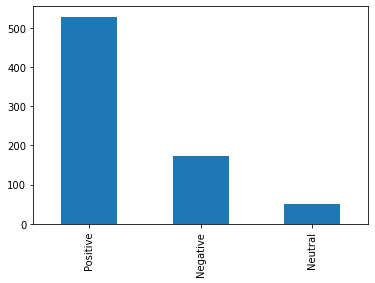

In [54]:
amazon['Analysis'].value_counts().plot(kind='bar')

In [55]:
amazon

original  rating  \
0    I am very happy to buy this product...Nice pro...     5.0   
1    Amazingly AmazonIt says 8 hrs but since I use ...     4.0   
2    base kingthe base is really good. it a value f...     4.0   
3    The head phone plastic band broken out.This pr...     1.0   
4    Cheap Plastic, Average product.  Sound is dist...     2.0   
5    Value for the moneySound is very crystal clear...     5.0   
6    Don't buy it please...Bass is disgusting... Ra...     1.0   
7    Cheap QualityI have used it for 1 month after ...     1.0   
8    After 2 month reviewMarvelous performanceIf yo...     4.0   
9    Broken within one month!!!I have been a huge f...     1.0   
10   Not goodMy ears and head stared paining. It's ...     1.0   
11   Pro and consI would like to start with pro sou...     4.0   
12   It's goodAfter reading these reviews where som...     5.0   
13                          Ok superSuper mind blowing     5.0   
14   Bad product I  wish I could give 0 stars to it...     2.0   
15   Problem with itThe headphones are kinda good i...     2.0   
16   Sound Quality Is Great, but Build Quality Poor...     3.0   
17   Poor ergonomicsBought it almost 4 months ago.W...     2.0   
18   Bluetooth ConnectivitySound quality is no doub...     4.0   
19   DISAPPOINTED ,DUPLICATE PRODUCTDon’t purchase ...     1.0   
20   Best at this price(999)I bought this to attend...     5.0   
21   Just okay. Not so great.This product is just o...     1.0   
22   Battery lifeI have been using this earphone fo...     5.0   
23   Just Above Average Product.For the price of 11...     4.0   
24   Uncomfortable, pain in earsI am using this hea...     3.0   
25   It just works• Good sound quality, vocals are ...     5.0   
26   What a stupid waste of moneyI can't believe th...     1.0   
27   Noise Cancellation?? My Son Can't Hear Me When...     5.0   
28   Not worth itWas working fine for the 1st week....     1.0   
29   Technical issueIt's been 2 months since I'm us...     1.0   
30   Average headphones with good mic qualityHey th...     4.0   
31   A decent product for a reasonable price!First ...     5.0   
32   Its a cheap version at high price.The product ...     2.0   
33   Balanced sound but longtime aches ear cause cu...     3.0   
34   Good product in this price rangeThe media coul...     3.0   
35   Cheap Plastic, Average product. Broken within ...     1.0   
36   BAD MIC , MIC IS NOT WORKINGBOUGHT ON 29 MAY 2...     1.0   
37   Only bass is goodBass n sound quality is good....     3.0   
38   Above average...This headphone is good for non...     4.0   
39   Cristal clear sound, stylish and perfect for a...     5.0   
40   Good productListening Music during walking is ...     4.0   
41   Buy it when your budget is super tight !Decent...     3.0   
42   Bad and good.First things first. While opening...     2.0   
43   Best headphone in this price rangeThis headpho...     4.0   
44   Full review plz read it before buying the head...     4.0   
45   everything is good but...the sound quality is ...     4.0   
46   A reasonable choice for the price.Writing the ...     4.0   
47   Battery Champ under 1kBought this for 999/-Its...     2.0   
48   Sound quality is crystal clear [HD] (high defi...     5.0   
49   Very bad build qualityProduct build quality is...     1.0   
50   Worst product, don't waste ur moneyEarcups/cus...     2.0   
51   Detective piece receivedDetective piece receiv...     2.0   
52   For Music loversAudio quality is great, music,...     5.0   
53   AmazingThe Boat Rockerz 370 is a fantastic hea...     5.0   
54   Brilliant product !!!Amazing product !! Specia...     4.0   
55   Very difficult switches to put the headphones ...     2.0   
56   Sound quality is fine. But it keeps disconnect...     3.0   
57   worst,worst,worst,not worth  of giving one sta...     1.0   
58   Best in the budgetFirst of all it's the best t...     5.0   
59   Not satisfied with mike quality.I used this he...     2.0   
60   Bad quality of 

## Generate Positive Reviews Word Cloud

In [56]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,max_words=300,background_color='black')

In [57]:
Positive = wc.generate(amazon[amazon['Polarity']>0]['reviews'].str.cat(sep=""))

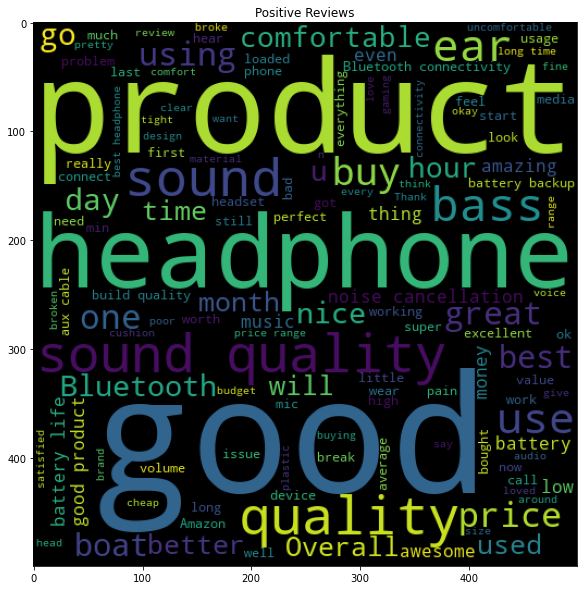

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(Positive)
plt.title('Positive Reviews')
plt.show()

## Generate Negative Reviews Word Cloud

In [59]:
Negative=wc.generate(amazon[amazon['Polarity']<0]['reviews'].str.cat(sep=""))

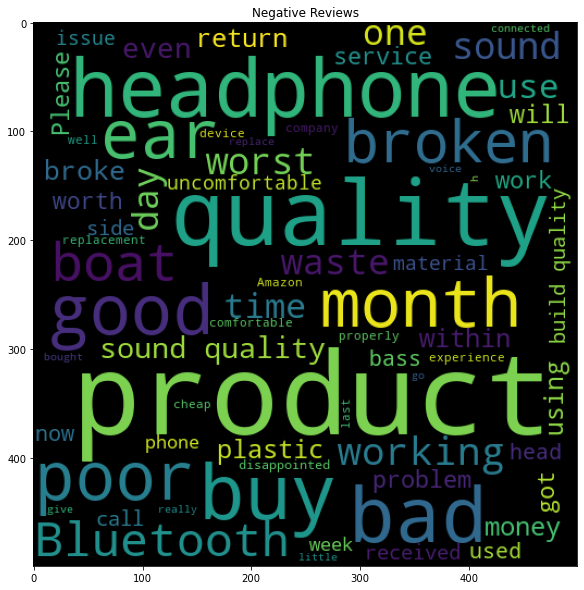

In [60]:
plt.figure(figsize=(10,10))
plt.imshow(Negative)
plt.title('Negative Reviews')
plt.show()

## Generate Neutral Reviews Word Cloud

In [61]:
Neutral = wc.generate(amazon[amazon['Polarity']==0]['reviews'].str.cat(sep=""))

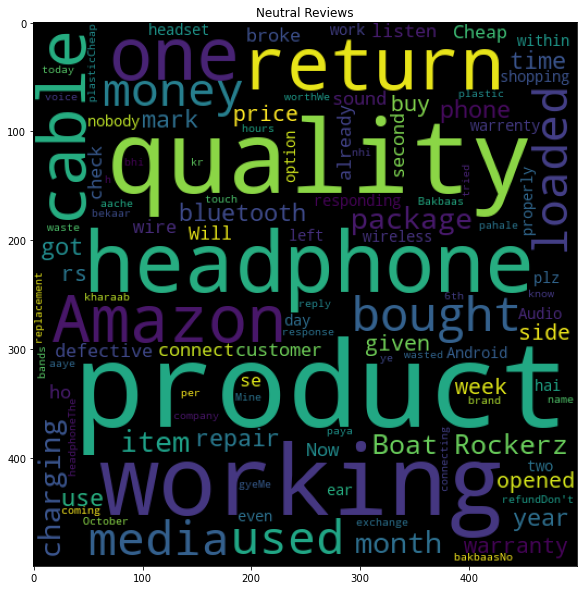

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(Neutral)
plt.title('Neutral Reviews')
plt.show()

# Model Building 

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
vectorizer=TfidfVectorizer(max_features=10000)

In [64]:
x=vectorizer.fit_transform(amazon['reviews'])

In [65]:
#rows, reviews
x.shape

(750, 3094)

### LabelEncoder for classification Model

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [67]:
amazon['target']=encoder.fit_transform(amazon['Analysis'])
amazon

original  rating  \
0    I am very happy to buy this product...Nice pro...     5.0   
1    Amazingly AmazonIt says 8 hrs but since I use ...     4.0   
2    base kingthe base is really good. it a value f...     4.0   
3    The head phone plastic band broken out.This pr...     1.0   
4    Cheap Plastic, Average product.  Sound is dist...     2.0   
5    Value for the moneySound is very crystal clear...     5.0   
6    Don't buy it please...Bass is disgusting... Ra...     1.0   
7    Cheap QualityI have used it for 1 month after ...     1.0   
8    After 2 month reviewMarvelous performanceIf yo...     4.0   
9    Broken within one month!!!I have been a huge f...     1.0   
10   Not goodMy ears and head stared paining. It's ...     1.0   
11   Pro and consI would like to start with pro sou...     4.0   
12   It's goodAfter reading these reviews where som...     5.0   
13                          Ok superSuper mind blowing     5.0   
14   Bad product I  wish I could give 0 stars to it...     2.0   
15   Problem with itThe headphones are kinda good i...     2.0   
16   Sound Quality Is Great, but Build Quality Poor...     3.0   
17   Poor ergonomicsBought it almost 4 months ago.W...     2.0   
18   Bluetooth ConnectivitySound quality is no doub...     4.0   
19   DISAPPOINTED ,DUPLICATE PRODUCTDon’t purchase ...     1.0   
20   Best at this price(999)I bought this to attend...     5.0   
21   Just okay. Not so great.This product is just o...     1.0   
22   Battery lifeI have been using this earphone fo...     5.0   
23   Just Above Average Product.For the price of 11...     4.0   
24   Uncomfortable, pain in earsI am using this hea...     3.0   
25   It just works• Good sound quality, vocals are ...     5.0   
26   What a stupid waste of moneyI can't believe th...     1.0   
27   Noise Cancellation?? My Son Can't Hear Me When...     5.0   
28   Not worth itWas working fine for the 1st week....     1.0   
29   Technical issueIt's been 2 months since I'm us...     1.0   
30   Average headphones with good mic qualityHey th...     4.0   
31   A decent product for a reasonable price!First ...     5.0   
32   Its a cheap version at high price.The product ...     2.0   
33   Balanced sound but longtime aches ear cause cu...     3.0   
34   Good product in this price rangeThe media coul...     3.0   
35   Cheap Plastic, Average product. Broken within ...     1.0   
36   BAD MIC , MIC IS NOT WORKINGBOUGHT ON 29 MAY 2...     1.0   
37   Only bass is goodBass n sound quality is good....     3.0   
38   Above average...This headphone is good for non...     4.0   
39   Cristal clear sound, stylish and perfect for a...     5.0   
40   Good productListening Music during walking is ...     4.0   
41   Buy it when your budget is super tight !Decent...     3.0   
42   Bad and good.First things first. While opening...     2.0   
43   Best headphone in this price rangeThis headpho...     4.0   
44   Full review plz read it before buying the head...     4.0   
45   everything is good but...the sound quality is ...     4.0   
46   A reasonable choice for the price.Writing the ...     4.0   
47   Battery Champ under 1kBought this for 999/-Its...     2.0   
48   Sound quality is crystal clear [HD] (high defi...     5.0   
49   Very bad build qualityProduct build quality is...     1.0   
50   Worst product, don't waste ur moneyEarcups/cus...     2.0   
51   Detective piece receivedDetective piece receiv...     2.0   
52   For Music loversAudio quality is great, music,...     5.0   
53   AmazingThe Boat Rockerz 370 is a fantastic hea...     5.0   
54   Brilliant product !!!Amazing product !! Specia...     4.0   
55   Very difficult switches to put the headphones ...     2.0   
56   Sound quality is fine. But it keeps disconnect...     3.0   
57   worst,worst,worst,not worth  of giving one sta...     1.0   
58   Best in the budgetFirst of all it's the best t...     5.0   
59   Not satisfied with mike quality.I used this he...     2.0   
60   Bad quality of 

In [68]:
y_svc=amazon['target'].values
y_svc

array([2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,

In [69]:
from sklearn.model_selection import train_test_split   

In [70]:
X_train,X_test,y_train,y_test=train_test_split(x,y_svc,test_size=0.1,random_state=40)

# SVC

In [71]:
from sklearn.svm import SVC
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [72]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[25,20,10,1,0.5],'C':[20,15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [20, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [25, 20, 10, 1, 0.5], 'kernel': ['rbf']}])

In [73]:
gsv.best_params_ , gsv.best_score_ 

({'C': 20, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8148156277436348)

In [74]:
clf = SVC(C= 20, gamma = 25)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 73.33333333333333


array([[ 0,  0, 13],
       [ 0,  1,  7],
       [ 0,  0, 54]], dtype=int64)

# KNN

In [75]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [77]:
print(grid_search.best_params_)

{'n_neighbors': 11}


In [78]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 77.62%


In [79]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

In [80]:
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [81]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [82]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 73.33333333333333


# Bagging Boosting 

In [83]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object

In [85]:
dcmodel = dcmodel.fit(X_train,y_train) #train decision tree
y_predict = dcmodel.predict(X_test)

In [86]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  78.66666666666666


# Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [88]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

In [89]:
rf.fit(X_train,y_train) # Fitting RandomForestClassifier model from sklearn.ensemble 
rf.estimators_ # 
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels 
rf.n_features_  # Number of input features in model 8 here.

rf.n_outputs_ # Number of outputs when fit performed

rf.oob_score_ 

0.7318518518518519

In [90]:
rf.predict(X_test)

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [91]:
preds = rf.predict(X_test)
pd.Series(preds).value_counts()

2    62
0     7
1     6
dtype: int64

In [92]:
preds

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [93]:
# In order to check whether the predictions are correct or wrong we will create a cross tab on y_test data

crosstable = pd.crosstab(y_test,preds)
crosstable

col_0  0  1   2
row_0          
0      3  0  10
1      1  5   2
2      3  1  50

In [94]:
# Final step we will calculate the accuracy of our model

# We are comparing the predicted values with the actual values and calculating mean for the matches
np.mean(preds==y_test)

0.7733333333333333

In [95]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.23      0.43      0.30         7
           1       0.62      0.83      0.71         6
           2       0.93      0.81      0.86        62

    accuracy                           0.77        75
   macro avg       0.59      0.69      0.63        75
weighted avg       0.84      0.77      0.80        75



# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [97]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)


LogisticRegression()

In [98]:
y_pred=classifier.predict(X_train)
y_pred

array([2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2,

In [99]:
confusion_matrix = confusion_matrix(y_train,y_pred)
confusion_matrix

array([[126,   0,  33],
       [  5,   6,  31],
       [  1,   0, 473]], dtype=int64)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.87       159
           1       1.00      0.14      0.25        42
           2       0.88      1.00      0.94       474

    accuracy                           0.90       675
   macro avg       0.95      0.64      0.68       675
weighted avg       0.91      0.90      0.88       675



### Logistic Regression giving the best result, we can use it for deployment

using logistic regression model, manualy testing the reviews......

In [101]:
test_review = vectorizer.transform([input()])
prediction  = classifier.predict(test_review)
if  prediction == 2:
    print("positive sentiment")
elif prediction == 1:
    print("nutral sentiment")
else :
    print("negative sentiment")

good
positive sentiment


# using knn model....

In [138]:
x=vectorizer.transform(amazon['reviews'])
prediction  = knn.predict(x)
import statistics as st
result = st.mode(prediction)
if  result == 2:
    print("positive sentiment")
elif result == 1:
    print("nutral sentiment")
else :
    print("negative sentiment")

positive sentiment


<AxesSubplot:xlabel='results', ylabel='count'>

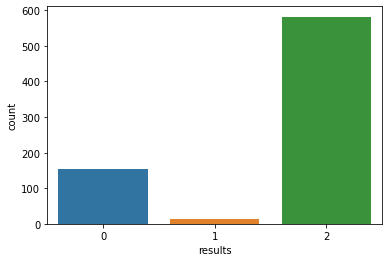

In [154]:
d = {'results':prediction}
pred = pd.DataFrame(data=d)
sns.countplot(pred['results'])

In [155]:
pred

results
0          2
1          2
2          2
3          0
4          2
5          2
6          0
7          2
8          2
9          0
10         2
11         2
12         2
13         2
14         0
15         2
16         2
17         2
18         2
19         0
20         2
21         0
22         2
23         2
24         2
25         2
26         0
27         2
28         0
29         2
30         2
31         2
32         2
33         2
34         2
35         0
36         0
37         2
38         2
39         2
40         2
41         2
42         0
43         2
44         2
45         2
46         2
47         2
48         2
49         0
50         2
51         2
52         2
53         2
54         2
55         2
56         0
57         0
58         2
59         2
60         0
61         2
62         2
63         2
64         2
65         2
66         2
67         2
68         2
69         2
70         2
71         2
72         2
73         2
74         2
75         0
76         2
77         0
78         2
79         2
80         0
81         2
82         2
83         2
84         2
85         2
86         2
87         2
88         2
89         2
90         2
91         2
92         2
93         2
94         2
95         2
96         0
97         2
98         2
99         2
100        2
101        0
102        2
103        2
104        2
105        2
106        0
107        2
108        2
109        2
110        2
111        2
112        0
113        2
114        0
115        0
116        2
117        2
118        2
119        0
120        2
121        0
122        2
123        2
124        2
125        1
126        2
127        2
128        2
129        0
130        2
131        2
132        2
133        2
134        2
135        2
136        2
137        2
138        0
139        0
140        0
141        2
142        0
143        2
144        0
145        2
146        2
147        2
148        2
149        0
150        2
151        0
152        2
153        2
154        2
155        2
156        0
157        2
158        2
159        2
160        2
161        2
162        2
163        0
164        2
165        2
166        2
167        2
168        2
169        2
170        2
171        2
172        2
173        2
174        0
175        2
176        0
177        2
178        2
179        2
180        2
181        2
182        2
183        2
184        2
185        2
186        2
187        2
188        2
189        2
190        2
191        2
192        0
193        2
194        2
195        0
196        2
197        0
198        2
199        2
200        0
201        2
202        2
203        2
204        2
205        2
206        2
207        2
208        0
209        2
210        0
211        2
212        2
213        2
214        2
215        2
216        0
217        2
218        0
219        2
220        0
221        2
222        2
223        0
224        2
225        2
226        2
227        2
228        2
229        2
230        2
231        2
232        2
233        2
234        2
235        2
236        2
237        2
238        2
239        2
240        2
241        2
242        2
243        2
244        0
245        2
246        2
247        0
248        2
249        0
250        2
251        2
252        0
253        0
254        2
255        2
256        2
257        2
258        2
259        2
260        2
261        2
262        0
263        0
264        0
265        2
266        2
267        2
268        2
269        2
270        2
271        2
272        2
273        2
274        2
275        2
276        2
277        2
278        2
279        2
280        2
281        2
282        2
283        2
284        2
285        0
286        2
287        1
288        2
289        0
290        1
291        2
292        2
293        2
294        0
295        2
296        2
297        2
298        2
299        2
300        2
301        2
302        2
303        2
304        2
305        2
306        2
3

In [157]:
def lable(score):
    if score == 0:
        return 'Negative'
    elif score == 1:
        return 'Neutral'
    else:
        return 'Positive'
pred['lable'] = pred['results'].apply(lable)

results     lable
0          2  Positive
1          2  Positive
2          2  Positive
3          0  Negative
4          2  Positive
5          2  Positive
6          0  Negative
7          2  Positive
8          2  Positive
9          0  Negative
10         2  Positive
11         2  Positive
12         2  Positive
13         2  Positive
14         0  Negative
15         2  Positive
16         2  Positive
17         2  Positive
18         2  Positive
19         0  Negative
20         2  Positive
21         0  Negative
22         2  Positive
23         2  Positive
24         2  Positive
25         2  Positive
26         0  Negative
27         2  Positive
28         0  Negative
29         2  Positive
30         2  Positive
31         2  Positive
32         2  Positive
33         2  Positive
34         2  Positive
35         0  Negative
36         0  Negative
37         2  Positive
38         2  Positive
39         2  Positive
40         2  Positive
41         2  Positive
42         0  Negative
43         2  Positive
44         2  Positive
45         2  Positive
46         2  Positive
47         2  Positive
48         2  Positive
49         0  Negative
50         2  Positive
51         2  Positive
52         2  Positive
53         2  Positive
54         2  Positive
55         2  Positive
56         0  Negative
57         0  Negative
58         2  Positive
59         2  Positive
60         0  Negative
61         2  Positive
62         2  Positive
63         2  Positive
64         2  Positive
65         2  Positive
66         2  Positive
67         2  Positive
68         2  Positive
69         2  Positive
70         2  Positive
71         2  Positive
72         2  Positive
73         2  Positive
74         2  Positive
75         0  Negative
76         2  Positive
77         0  Negative
78         2  Positive
79         2  Positive
80         0  Negative
81         2  Positive
82         2  Positive
83         2  Positive
84         2  Positive
85         2  Positive
86         2  Positive
87         2  Positive
88         2  Positive
89         2  Positive
90         2  Positive
91         2  Positive
92         2  Positive
93         2  Positive
94         2  Positive
95         2  Positive
96         0  Negative
97         2  Positive
98         2  Positive
99         2  Positive
100        2  Positive
101        0  Negative
102        2  Positive
103        2  Positive
104        2  Positive
105        2  Positive
106        0  Negative
107        2  Positive
108        2  Positive
109        2  Positive
110        2  Positive
111        2  Positive
112        0  Negative
113        2  Positive
114        0  Negative
115        0  Negative
116        2  Positive
117        2  Positive
118        2  Positive
119        0  Negative
120        2  Positive
121        0  Negative
122        2  Positive
123        2  Positive
124        2  Positive
125        1   Neutral
126        2  Positive
127        2  Positive
128        2  Positive
129        0  Negative
130        2  Positive
131        2  Positive
132        2  Positive
133        2  Positive
134        2  Positive
135        2  Positive
136        2  Positive
137        2  Positive
138        0  Negative
139        0  Negative
140        0  Negative
141        2  Positive
142        0  Negative
143        2  Positive
144        0  Negative
145        2  Positive
146        2  Positive
147        2  Positive
148        2  Positive
149        0  Negative
150        2  Positive
151        0  Negative
152        2  Positive
153        2  Positive
154        2  Positive
155        2  Positive
156        0  Negative
157        2  Positive
158        2  Positive
159        2  Positive
160        2  Positive
161        2  Positive
162        2  Positive
163        0  Negative
164        2  Positive
165        2  Positive
166        2  Positive
167        2  Positive
168        2  Positive
169        2  Positive
170        2  Positive
171        2  Positive
172        2  Positive
173

# knn model pickle

In [103]:
import pickle
pickle.dump(knn,open('model.pkl','wb'))

In [104]:
#dumping tf_idf
pickle.dump(vectorizer, open('vectorizer.pkl', "wb"))